<div class="alert alert-info">It is a end to end tutorial to see how you can preprocess the data and use data science plot to evaluate the model
    </div>

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

%load_ext autoreload
%autoreload 2

# Load data

In [2]:
train = pd.read_csv("../../data/titanic/train.csv")
test = pd.read_csv("../../data/titanic/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Viz

In [4]:
# from dataprep.eda import create_report

# create_report(train).show()

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# from dataprep.eda import plot, plot_correlation, plot_missing

# plot(train, "Pclass", "Survived")

In [7]:
# plot(train,"Survived", "Pclass")

In [8]:
# plot(train,"Survived", "Pclass")

# Train test split

In [9]:
target_name = "Survived"

In [10]:
def extract_X_y(df, target_name):
    X = df[[col for col in df.columns if col != target_name]]
    y = df[[target_name]]
    return X, y

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X, y = extract_X_y(train, target_name)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,  test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Boosting

## XGBoost

<div class="alert alert-info">
XGBoost has become in 2017-2018 a widely used and really popular tool among Kaggle competitors and Data Scientists in industry, as it has been battle tested for production on large-scale problems. It is a highly flexible and versatile tool that can work through most regression, classification and ranking problems as well as user-built objective functions. As an open-source software.
    
https://www.kdnuggets.com/2017/10/xgboost-top-machine-learning-method-kaggle-explained.html
    
    
But it can suffer from overfitting with small dataset.
    
Please refer to these links : 
- https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/
- https://towardsdatascience.com/xgboost-mathematics-explained-58262530904a
</div>

### Preprocessing

In [14]:
from john_toolbox.preprocessing.pandas_pipeline import PandasPipeline
from src.xgboost.preprocessing import (
    conformity_column_list,
    data_cleaning_list,
    encoder_list
)

#### Define PandasPipeline

In [15]:
step_list = conformity_column_list + data_cleaning_list + encoder_list

pipeline = PandasPipeline(
    steps=step_list, target_name=target_name, verbose=True)

#### Fit transform

In [16]:
train_transformed = pipeline.fit_transform(
    df=pd.concat([X_train, y_train], axis=1))

X_train, y_train = extract_X_y(train_transformed, target_name)

[Pipeline] ...... (step 1 of 9) Processing DROP columns, total=   0.0s
[Pipeline]  (step 2 of 9) Processing CAST Embarked to str, total=   0.0s
[Pipeline] ... (step 3 of 9) Processing CAST Sex to str, total=   0.0s
[Pipeline] . (step 4 of 9) Processing CAST Cabin to str, total=   0.0s
[Pipeline] .. (step 5 of 9) Processing Imputer_mean_Age, total=   0.0s
[Pipeline] . (step 6 of 9) Processing Fillna by unknown, total=   0.0s
[Pipeline] ............... (step 7 of 9) Processing OHE, total=   0.0s
[Pipeline] ...... (step 8 of 9) Processing OHE Embarked, total=   0.0s
[Pipeline]  (step 9 of 9) Processing OrdinalEncoder Cabin, total=   0.0s


In [17]:
X_train.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Age,OHE_Sex_female,OHE_Sex_male,OHE_Embarked_C,OHE_Embarked_Q,OHE_Embarked_S,OHE_Embarked_nan,Cabin
692,693,3,0,0,56.4958,29.807687,0.0,1.0,0.0,0.0,1.0,0.0,127.0
481,482,2,0,0,0.0000,29.807687,0.0,1.0,0.0,0.0,1.0,0.0,127.0
527,528,1,0,0,221.7792,29.807687,0.0,1.0,0.0,0.0,1.0,0.0,76.0
855,856,3,0,1,9.3500,18.000000,1.0,0.0,0.0,0.0,1.0,0.0,127.0
801,802,2,1,1,26.2500,31.000000,1.0,0.0,0.0,0.0,1.0,0.0,127.0


In [18]:
valid_transformed = pipeline.transform(
    df=pd.concat([X_valid, y_valid], axis=1))

X_valid, y_valid = extract_X_y(valid_transformed, target_name)

### TRAIN with XGB

In [19]:
# https://www.kaggle.com/prashant111/a-guide-on-xgboost-hyperparameters-tuning
# https://xgboost.readthedocs.io/en/latest/parameter.html

In [20]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [21]:
from xgboost import XGBClassifier

params = {
    "booster": "gbtree", # default
    "n_estimators": 900,
    "max_depth": 6,
    "min_child_weight": 1,
    "eta":0.1,
    "scale_pos_weight": 1,
    "subsample": 0.8,
    "colsample_bytree": 1,
    "random_state": 42,
    "n_jobs": -1,
    "missing": -1
    
}
xgb = XGBClassifier(**params)

In [22]:
eval_metric = ["logloss", "auc"]
eval_names = ["train", "valid"]

xgb.fit(
    X_train,
    y_train.to_numpy().reshape(-1),
    early_stopping_rounds=30,
    eval_set=[(X_train, y_train.to_numpy().reshape(-1)), (X_valid, y_valid.to_numpy().reshape(-1))],
    eval_metric=eval_metric,
    verbose=True
)

/work/.cache/poetry/john-toolbox-DJpFP61h-py3.8/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.64261	validation_0-auc:0.88347	validation_1-logloss:0.65319	validation_1-auc:0.80402
[1]	validation_0-logloss:0.59726	validation_0-auc:0.89872	validation_1-logloss:0.62033	validation_1-auc:0.80600
[2]	validation_0-logloss:0.56017	validation_0-auc:0.90743	validation_1-logloss:0.59815	validation_1-auc:0.80422
[3]	validation_0-logloss:0.52947	validation_0-auc:0.91896	validation_1-logloss:0.57908	validation_1-auc:0.81047
[4]	validation_0-logloss:0.50242	validation_0-auc:0.92493	validation_1-logloss:0.56406	validation_1-auc:0.80665
[5]	validation_0-logloss:0.47926	validation_0-auc:0.92471	validation_1-logloss:0.55164	validation_1-auc:0.80415
[6]	validation_0-logloss:0.45655	validation_0-auc:0.92606	validation_1-logloss:0.53784	validation_1-auc:0.80870
[7]	validation_0-logloss:0.43619	validation_0-auc:0.92988	validation_1-logloss:0.53044	validation_1-auc:0.80316
[8]	validation_0-logloss:0.41877	validation_0-auc:0.93106	validation_1-logloss:0.52116	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=-1, monotone_constraints='()',
              n_estimators=900, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
results = xgb.evals_result()
print(results.keys())

dict_keys(['validation_0', 'validation_1'])


## Catboost

Catboost is newer and has the advantage to handle natively categorical column. So no need to do one hot encoding. It Reduce overfitting when constructing the models with a novel gradient-boosting scheme.
It can be used in GPU mode.
- https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db
- https://catboost.ai/#benchmark
- https://github.com/catboost/tutorials
- https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview

# Evaluation

In [24]:
from john_toolbox.evaluation.visualisation import (
    plot_auc_curves,
    plot_classification_report,
    compare_eval_result_xgb,
    plot_cm,
)

## Analyse training eval_metric

eval_names : ['train', 'valid'], eval_metric :  ['logloss', 'auc']


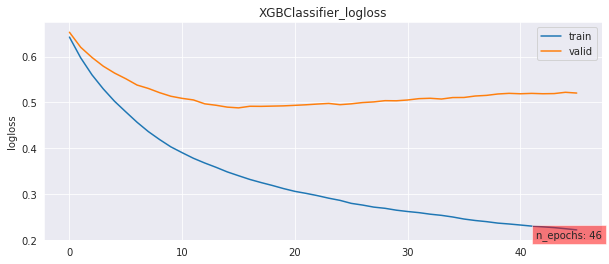

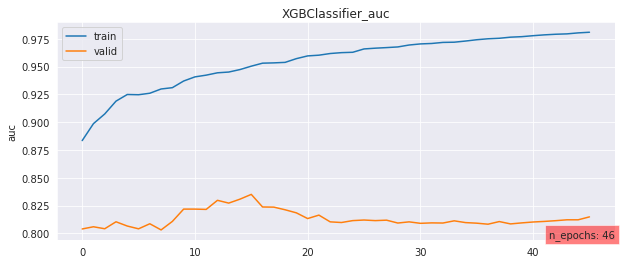

In [25]:
print(f"eval_names : {eval_names}, eval_metric :  {eval_metric}")

compare_eval_result_xgb(
    xgb,
    eval_names=eval_names,
    eval_metrics=eval_metric,
    size=(10, 4)
)

## Evaluate valid set

In [26]:
y_pred_valid_prob = xgb.predict_proba(X_valid)[:, 1]

### Get best threshold

#### Optimize with the default value roc_curve or prauc_curve

In [27]:
from john_toolbox.evaluation.metrics import get_optimal_threshold

roc_curve_tresh = get_optimal_threshold(y_valid, y_pred_valid_prob, "roc_curve")
prauc_curve_tresh = get_optimal_threshold(y_valid, y_pred_valid_prob, "prauc_curve")

Best Threshold to maximize roc_curve=0.501921
Best Threshold to maximize prauc_curve=0.353509, F-Score=0.71724


#### Optimize with custom metric function

In [28]:
from sklearn.metrics import f1_score

custom_tresh = get_optimal_threshold(y_valid, y_pred_valid_prob, metric_func=f1_score, is_maximize=True)

Best Threshold to maximize f1_score=0.501000, f1_score=0.71429


In [29]:
from john_toolbox.evaluation.metrics import to_labels

y_pred_valid = to_labels(y_pred_valid_prob, roc_curve_tresh) # roc_curve_tresh, prauc_curve_tresh, custom_tresh

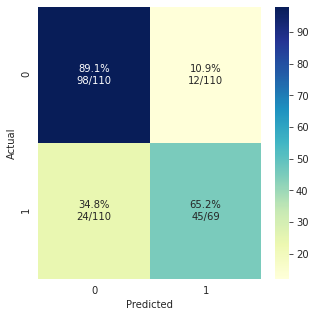

In [30]:
plot_cm(y_valid, y_pred_valid, figsize=(5, 5))

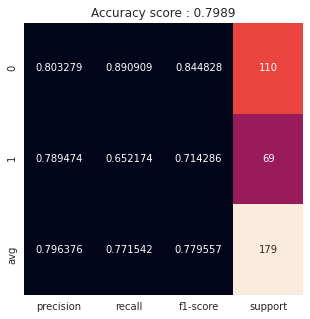

In [31]:
plot_classification_report(y_valid, y_pred_valid, size=(5, 5))

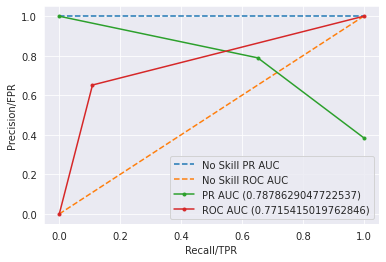

In [32]:
plot_auc_curves(y_valid, y_pred_valid)

## Evaluate train set

In [33]:
y_pred_train_prob = xgb.predict_proba(X_train)[:, 1]
y_pred_train = to_labels(y_pred_train_prob, roc_curve_tresh) # roc_curve_tresh, prauc_curve_tresh, custom_tresh

### Confusion matrix

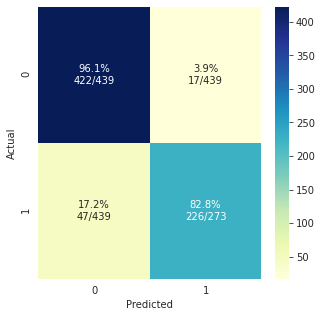

In [34]:
# https://www.kaggle.com/agungor2/various-confusion-matrix-plots
plot_cm(y_train, y_pred_train, figsize=(5, 5))

### classification_report

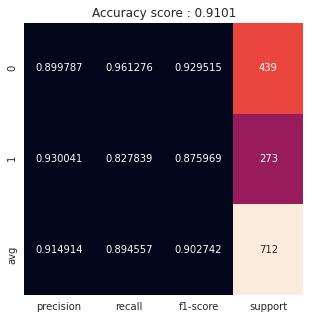

In [35]:
plot_classification_report(y_train, y_pred_train, size=(5, 5))

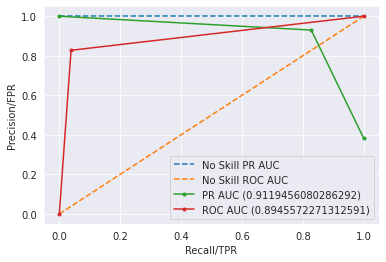

In [36]:
plot_auc_curves(y_train, y_pred_train)

# Prediction

In [37]:
test_transformed = pipeline.transform(test)
X_test = test_transformed[[col for col in train_transformed.columns if col != "Survived"]]

In [38]:
y_preds = to_labels(xgb.predict_proba(X_test)[:, 1], roc_curve_tresh) # roc_curve_tresh, prauc_curve_tresh, custom_tresh)

In [39]:
output = pd.DataFrame({'PassengerId': X_test.PassengerId, 'Survived': y_preds})
output.to_csv('my_submission.csv', index=False)